Regressao Logística
======================

Baseado em:

http://aimotion.blogspot.com.br/2011/11/machine-learning-with-python-logistic.html

http://stackoverflow.com/questions/17784587/gradient-descent-using-python-and-numpy

http://machinelearningmastery.com/implement-logistic-regression-stochastic-gradient-descent-scratch-python/

http://ufldl.stanford.edu/tutorial/supervised/OptimizationStochasticGradientDescent/

http://ufldl.stanford.edu/tutorial/supervised/

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_bfgs.html

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
from scipy.optimize import fmin_bfgs

[ 0.  0.  0.  1.  1.  0.  1.  1.  1.  1.  0.  0.  1.  1.  0.  1.  1.  0.
  1.  1.  0.  1.  0.  0.  1.  1.  1.  0.  0.  0.  1.  1.  0.  1.  0.  0.
  0.  1.  0.  0.  1.  0.  1.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  0.
  0.  0.  1.  0.  1.  1.  1.  0.  0.  0.  0.  0.  1.  0.  1.  1.  0.  1.
  1.  1.  1.  1.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.  0.  1.  1.  0.
  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.]


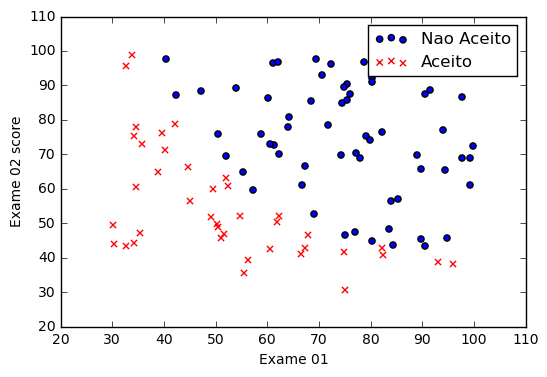

In [5]:
#load the dataset
data = np.loadtxt('../data/lr2d.txt', delimiter=',')

X = data[:, 0:2]
y = data[:, 2]
print y
pos = np.where(y == 1)
neg = np.where(y == 0)
plt.scatter(X[pos, 0], X[pos, 1], marker='o', c='b')
plt.scatter(X[neg, 0], X[neg, 1], marker='x', c='r')
plt.xlabel('Exame 01')
plt.ylabel('Exame 02 score')
plt.legend(['Nao Aceito', 'Aceito'])
plt.show()

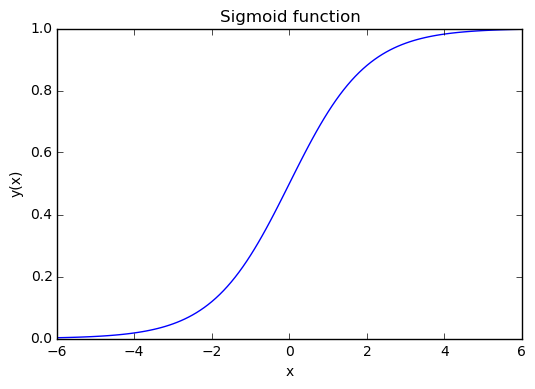

In [6]:
#Sigmoid function
def sigmoid(X):
    '''Compute the sigmoid function '''
    den = 1.0 + np.exp(-1.0 * X)
    d = 1.0 / den
    return d

x1 = np.arange(-6,6,0.1)
y1 = sigmoid(x1)
plt.plot(x1,y1)
plt.xlabel("x")
plt.ylabel("y(x)")
plt.title("Sigmoid function")
plt.show()

(80, 3)


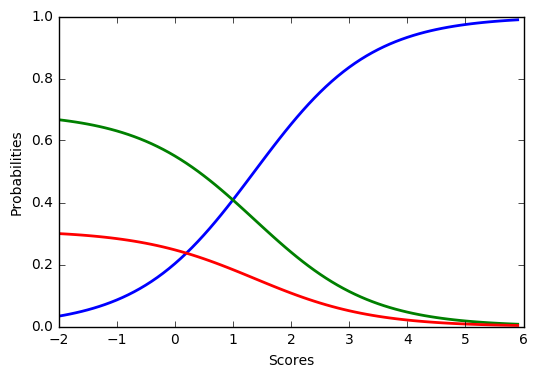

In [36]:
#softmax function
def softmax(x):
    aux = np.exp(x)
    return (aux.T/aux.sum(axis = 1)).T

x2 = np.arange(-2.0, 6.0, 0.1)
scores = np.vstack([x2, np.ones_like(x2), 0.2 * np.ones_like(x2)]).T
print scores.shape

plt.plot(x2, softmax(scores), linewidth=2)
plt.xlabel("Scores")
plt.ylabel("Probabilities")
plt.show()

In [7]:
def cost_function(theta,X,y): 
    n = X.shape[0] # Número de amostras 
    scores = sigmoid(np.dot(X,theta[1:])+theta[0]).ravel()
    J = 1.0/n*(-y*np.log(scores) - (1-y)*np.log(1-scores))
    return J

print cost_function(np.array([0.1,0.2,0.3]),X,y)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[ -6.08402217e-14  -4.04476897e-09  -2.21156427e-13   0.00000000e+00
   0.00000000e+00  -5.05040454e-12   0.00000000e+00  -2.36921593e-13
   0.00000000e+00  -8.92619312e-14  -4.46309656e-14  -2.84261503e-11
   0.00000000e+00   0.00000000e+00  -4.13002965e-14   0.00000000e+00
  -1.21902488e-13  -9.39914813e-13   0.00000000e+00  -1.17905685e-13
  -3.33710837e-12   0.00000000e+00  -1.59159352e-11  -1.67865877e-09
  -2.22044605e-16  -2.66453526e-15  -1.41886503e-13  -6.50590692e-14
  -1.09223741e-12  -1.31672451e-12  -1.33226763e-15  -1.33226763e-15
  -1.60538249e-13  -2.44249065e-14  -1.54

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in multiply


(100, 2)
[ 30.16579712   1.000559  ]


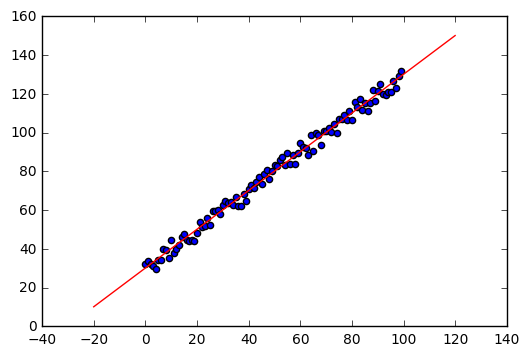

In [44]:
import numpy as np
import random


def compute_grad(theta, X, y):
    theta.shape = (1, 3)
    grad = zeros(3)
    h = sigmoid(X.dot(theta.T))

    delta = h - y

    l = grad.size

    for i in range(l):
        sumdelta = delta.T.dot(X[:, i])
        grad[i] = (1.0 / m) * sumdelta * - 1

    theta.shape = (3,)
    return grad

# m denotes the number of examples here, not the number of features
def gradientDescent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        #print("Iteration %d | Cost: %f" % (i, cost))
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    return theta


def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 10)
print x.shape
m, n = np.shape(x)
numIterations= 100000
alpha = 0.0005
theta = np.ones(n)
theta = gradientDescent(x, y, theta, alpha, m, numIterations)
print(theta)
plt.scatter(x[:,1],y)
x1 = np.arange(-20,120,0.1)
y1 = theta[1]*x1+theta[0]
plt.plot(x1,y1,'r')
plt.show()